<a href="https://colab.research.google.com/github/saugata-malakar/Summer-Analytics-2021-IIT-Guwahati/blob/main/SENTIMENT_ANALYSIS_ON_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
datatattle_covid_19_nlp_text_classification_path = kagglehub.dataset_download('datatattle/covid-19-nlp-text-classification')

print('Data source import complete.')


100%|██████████| 4.38M/4.38M [00:00<00:00, 4.75MB/s]

Extracting files...


Data source import complete.


In [4]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Data manipulation
import numpy as np
import pandas as pd

# WordCloud and NLP
from wordcloud import WordCloud
import nltk
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Regular expressions
import re


In [5]:
import pandas as pd

# Updated paths since files are directly in /kaggle/input
train_path = "/kaggle/input/Corona_NLP_train.csv"
test_path = "/kaggle/input/Corona_NLP_test.csv"

# Load the files with specified encoding
try:
    train_data = pd.read_csv(train_path, encoding="ISO-8859-1")  # or encoding="latin1"
    test_data = pd.read_csv(test_path, encoding="ISO-8859-1")
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e}")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/Corona_NLP_train.csv'


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#47abc9;">1.1_DATA_INSPECTION</p>

In [6]:
train_data.head()

NameError: name 'train_data' is not defined

In [8]:
# ipython-input-5-c4dda1b59424

import pandas as pd

# Updated paths since files are directly in /kaggle/input
train_path = "/kaggle/input/Corona_NLP_train.csv"
test_path = "/kaggle/input/Corona_NLP_test.csv"

# Load the files with specified encoding
try:
    train_data = pd.read_csv(train_path, encoding="ISO-8859-1")  # or encoding="latin1"
    test_data = pd.read_csv(test_path, encoding="ISO-8859-1")
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e}")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")

# ipython-input-6-c4dda1b59424
train_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/Corona_NLP_train.csv'


NameError: name 'train_data' is not defined

In [10]:
# ipython-input-5-c4dda1b59424

import pandas as pd

# Updated paths since files are directly in /kaggle/input
train_path = "/content/Corona_NLP_train.csv.zip"
test_path = "/content/Corona_NLP_test.csv"

# Load the files with specified encoding
try:
    train_data = pd.read_csv(train_path, encoding="ISO-8859-1")  # or encoding="latin1"
    test_data = pd.read_csv(test_path, encoding="ISO-8859-1")
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e}")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")

# ipython-input-6-c4dda1b59424
train_data.head()

Files loaded successfully.


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


from matplotlib import pyplot as plt
_df_0['UserName'].plot(kind='hist', bins=20, title='UserName')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['ScreenName'].plot(kind='hist', bins=20, title='ScreenName')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('OriginalTweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='UserName', y='ScreenName', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['UserName']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'UserName'}, axis=1)
              .sort_values('UserName', ascending=True))
  xs = counted['UserName']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('UserName', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Location')):
  _plot_series(series, series_name, i)
  fig.legend(title='Location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UserName')
_ = plt.ylabel('count()')

) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['UserName']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'UserName'}, axis=1)
              .sort_values('UserName', ascending=True))
  xs = counted['UserName']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('UserName', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('OriginalTweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='OriginalTweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UserName')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['UserName']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'UserName'}, axis=1)
              .sort_values('UserName', ascending=True))
  xs = counted['UserName']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('UserName', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('UserName')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ScreenName']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ScreenName'}, axis=1)
              .sort_values('ScreenName', ascending=True))
  xs = counted['ScreenName']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ScreenName', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Location')):
  _plot_series(series, series_name, i)
  fig.legend(title='Location', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ScreenName')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['UserName'].plot(kind='line', figsize=(8, 4), title='UserName')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['ScreenName'].plot(kind='line', figsize=(8, 4), title='ScreenName')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['OriginalTweet'].value_counts()
    for x_label, grp in _df_12.groupby('Location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location')
_ = plt.ylabel('OriginalTweet')

) missing from current font.
  fig.canvas.draw()
) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Sentiment'].value_counts()
    for x_label, grp in _df_13.groupby('OriginalTweet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('OriginalTweet')
_ = plt.ylabel('Sentiment')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='UserName', y='Location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['OriginalTweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='UserName', y='OriginalTweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='UserName', y='Sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='ScreenName', y='Location', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [11]:
train_data['Sentiment'].value_counts()

,count
Sentiment,
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


In [13]:
def change_sen(sentiment):

    if sentiment == "Extremely Positive":

        return 'positive'

    elif sentiment == "Extremely Negative":

        return 'negative'

    elif sentiment == "Positive":

        return 'positive'

    elif sentiment == "Negative":

        return 'negative'

    else:

        return 'netural'

In [14]:
train_data['Sentiment'] = train_data['Sentiment'].apply(lambda x: change_sen(x))

test_data['Sentiment'] = test_data['Sentiment'].apply(lambda x: change_sen(x))

In [15]:
# pick any orignal tweet from dataset

train_data['OriginalTweet'][3]


"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [16]:
train_data['OriginalTweet'][5].lower()

'as news of the regionâ\x92s first confirmed covid-19 case came out of sullivan county last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @tim_dodson reports https://t.co/cfxch7a2lu'

In [17]:
print(train_data.shape)

print(test_data.shape)

(41157, 6)
(3798, 6)


In [18]:
print(train_data.columns)

print(test_data.columns)


Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [20]:
# check the missisng value in percentage

print(f"MISSSING VALUE IN PERCENTAGE {train_data.isnull().sum()/len(train_data)*100}")

print(f"MISSSING VALUE IN PERCENTAGE {test_data.isnull().sum()/len(train_data)*100}")

MISSSING VALUE IN PERCENTAGE UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64
MISSSING VALUE IN PERCENTAGE UserName         0.000000
ScreenName       0.000000
Location         2.026387
TweetAt          0.000000
OriginalTweet    0.000000
Sentiment        0.000000
dtype: float64


In [22]:
# remove the missing value from location column

train_data=train_data.dropna(subset=['Location'])

test_data=test_data.dropna(subset=['Location'])


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#47abc9;">1.3_EDA</p>

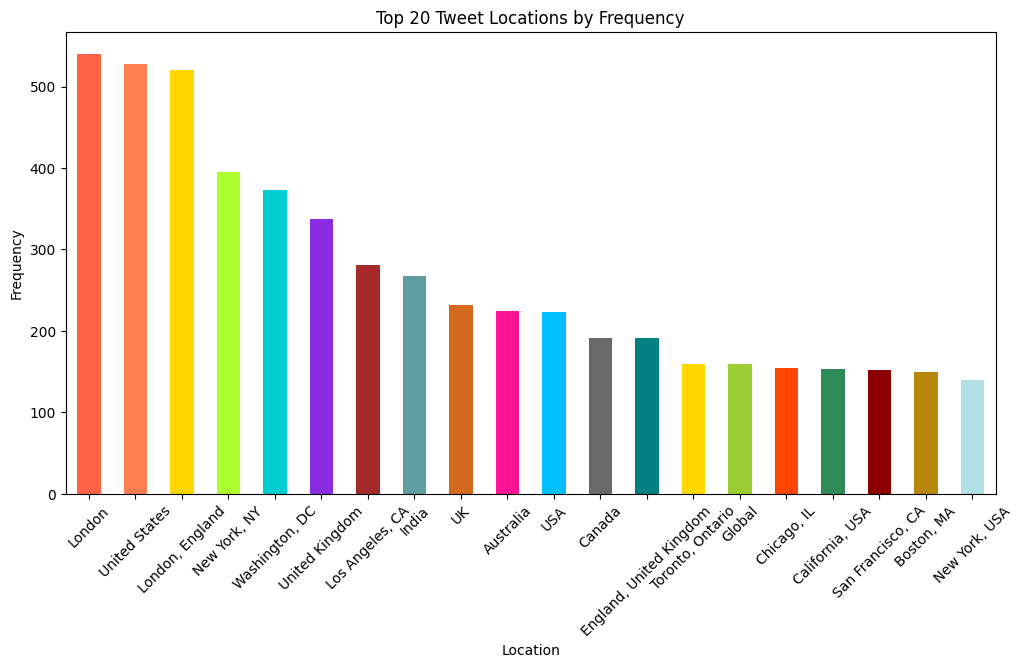

In [23]:
# Count the values in the 'Location' column and get the top 20
top_20 = train_data['Location'].value_counts().head(20)

# Custom colors for the bars
colors = ['#FF6347', '#FF7F50', '#FFD700', '#ADFF2F', '#00CED1',
          '#8A2BE2', '#A52A2A', '#5F9EA0', '#D2691E', '#FF1493',
          '#00BFFF', '#696969', '#008080', '#FFD700', '#9ACD32',
          '#FF4500', '#2E8B57', '#8B0000', '#B8860B', '#B0E0E6']

# Plot the bar chart with custom colors
top_20.plot(kind='bar', color=colors, rot=45, figsize=(12, 6))

# Add title and labels
plt.title("Top 20 Tweet Locations by Frequency")
plt.ylabel('Frequency')
plt.xlabel('Location')
plt.show()


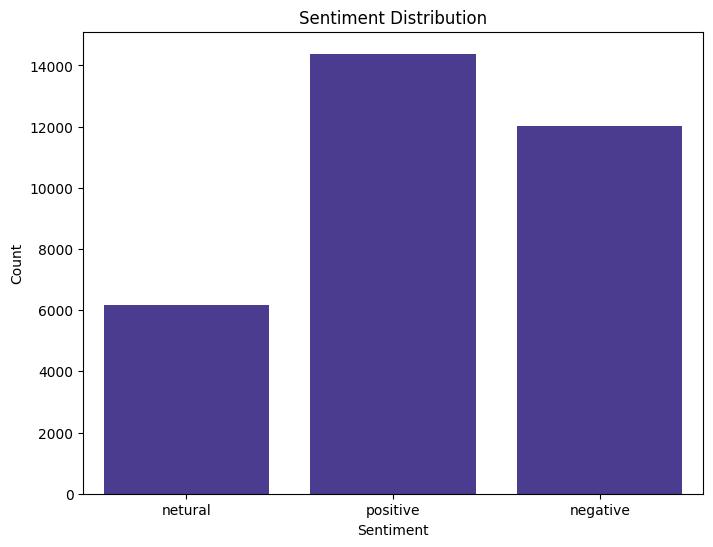

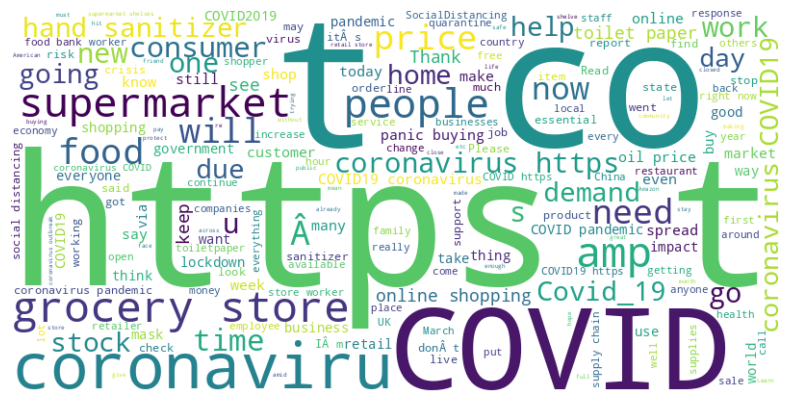

In [25]:
# Plot sentiment distribution

plt.figure(figsize=(8, 6))

sns.countplot(x='Sentiment', data=train_data, color='#422e9e')

plt.title("Sentiment Distribution")

plt.xlabel("Sentiment")

plt.ylabel("Count")

plt.show()



# Word cloud for frequently used words in 'OriginalTweet' column

text = " ".join(tweet for tweet in train_data['OriginalTweet'] if isinstance(tweet, str))  # Ensures text is string

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)



plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()


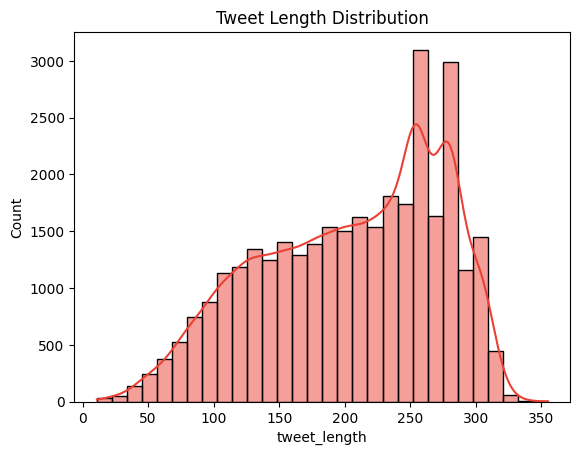

In [26]:


# Assuming train_df is already loaded with the 'tweet_length' column calculated
train_data['tweet_length'] = train_data['OriginalTweet'].apply(len)

# Plot with color palette
sns.histplot(train_data['tweet_length'], bins=30, kde=True, color="#eb4034")
plt.title("Tweet Length Distribution")
plt.show()


In [27]:
train_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'tweet_length'],
      dtype='object')

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32567 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       32567 non-null  int64 
 1   ScreenName     32567 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        32567 non-null  object
 4   OriginalTweet  32567 non-null  object
 5   Sentiment      32567 non-null  object
 6   tweet_length   32567 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.0+ MB


In [29]:
train_data['Sentiment'].value_counts()

,count
Sentiment,
positive,14383
negative,12012
netural,6172


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#47abc9;">1.4_PREPROCESS</p>

In [32]:
X = train_data['OriginalTweet'].copy()

y = train_data['Sentiment'].copy()

n_1')

In [33]:
def data_cleaner(tweet):



    # remove urls

    tweet = re.sub(r'http\S+', ' ', tweet)



    # remove html tags

    tweet = re.sub(r'<.*?>',' ', tweet)



    # remove digits

    tweet = re.sub(r'\d+',' ', tweet)



    # remove hashtags

    tweet = re.sub(r'#\w+',' ', tweet)



    # remove mentions

    tweet = re.sub(r'@\w+',' ', tweet)



    #removing stop words

    tweet = tweet.split()

    tweet = " ".join([word for word in tweet if not word in stop_words])



    return tweet





stop_words = stopwords.words('english')



X_cleaned = X.apply(data_cleaner)

X_cleaned.head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [34]:
import nltk
import re
from nltk.corpus import stopwords

# Download the 'stopwords' dataset
nltk.download('stopwords')

def data_cleaner(tweet):
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    return tweet

stop_words = stopwords.words('english')

X_cleaned = X.apply(data_cleaner)
X_cleaned.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,OriginalTweet
0,
1,advice Talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths give elderly...
5,As news regionÂs first confirmed COVID- case ...
6,Cashier grocery store sharing insights To prov...


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#47abc9;">1.5_TOKENIZE_DATA</p>

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)

# Tokenize the text
X = tokenizer.texts_to_sequences(X_cleaned)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Show example
print(f"\nSentence:\n{X_cleaned[6]}")
print(f"\nAfter tokenizing:\n{X[6]}")

# Pad sequences
X = pad_sequences(X, padding='post')
print(f"\nAfter padding:\n{X[6]}")


Vocabulary size: 31932

Sentence:
Cashier grocery store sharing insights To prove credibility commented "I'm Civics class I know I'm talking about".

After tokenizing:
[34, 1, 66, 4, 9939, 4251, 149, 745, 38, 89, 2457, 165, 182, 150, 814, 720, 170, 23, 264, 1408, 12, 797, 422, 327, 106, 1997]

After padding:
[  34    1   66    4 9939 4251  149  745   38   89 2457  165  182  150
  814  720  170   23  264 1408   12  797  422  327  106 1997    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [36]:
text = {"netural":0, "positive":1,"negative":2}
train_data['Sentiment'] = train_data['Sentiment'].map(text)

y.replace(text, inplace=True)

<ipython-input-36-7b13fec9d2df>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(text, inplace=True)


In [37]:
y.shape

(32567,)

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#47abc9;">1.7_DFINE_MODEL</p>

In [38]:
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 32
embedding_dim = 16
units = 256


# Define the model
model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim),  # Removed input_length argument
    L.Bidirectional(L.LSTM(units, return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)  # Assuming 3 classes for classification
])

# Compile the model
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

# Clear any previous sessions (optional)
tf.keras.backend.clear_session()


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#47abc9;">1.8_COMPILE_THE_MODEL</p>

In [ ]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=0.12, batch_size=BATCH_SIZE)

Epoch 1/10
863/896 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - accuracy: 0.5059 - loss: 0.9359

In [ ]:

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# <p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#47abc9;">1.9_CONFUSION_MATRIX</p>

In [ ]:
X_test = test_data['OriginalTweet'].copy()
y_test = test_data['Sentiment'].copy()

X_test = X_test.apply(data_cleaner)

X_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post')

y_test.replace(text, inplace=True)

In [ ]:
# If the model's output is probabilities, use argmax to get class labels
pred = model.predict(X_test).argmax(axis=1)  # Ensure pred is a 1D array of integers


In [ ]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

In [ ]:
# Check unique values in y_test and pred
print("Unique values in y_test:", y_test.unique())
print("Unique values in pred:", np.unique(pred))


In [ ]:
# Check unique values in y_test and pred to ensure they are consistent
print("Unique values in y_test:", y_test.unique())
print("Unique values in pred:", np.unique(pred))

# If necessary, convert y_test to numeric labels (if they are still strings)
if y_test.dtype == 'object':
    y_test = y_test.replace(text_mapping)

# If necessary, make sure pred is in the correct format (e.g., integer labels)
pred = pred.astype(int)

# Now compute the confusion matrix
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, pred)

# Create DataFrame for visualization of confusion matrix
labels = ['neutral', 'positive', 'negative']
cm = pd.DataFrame(conf, index=labels, columns=labels)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
